In [1]:
import numpy as np
import pickle
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import normalize

In [2]:
def load_starspace(file):
    result = {}
    for line in file:
        word, *emb = line.rstrip().split('\t')
        result[word] = np.array([float(x) for x in emb], dtype='float32')
    return result

In [3]:
with open('../data/train/embeddings.emb.tsv') as f:
    emb = load_starspace(f)

In [4]:
emb_keys = list(emb.keys())

In [5]:
emb_values = [normalize(emb[k].reshape(1, -1)).ravel() for k in emb_keys]

In [15]:
emb_keys_sample = emb_keys[:1500]

In [16]:
emb_keys_sample.index('python')

168

In [17]:
emb_values_sample = [normalize(emb[k].reshape(1, -1)).ravel() for k in emb_keys_sample]

In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(metric='cosine')

In [20]:
transformed_values_sample = tsne.fit_transform(emb_values_sample)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
from adjustText import adjust_text

222

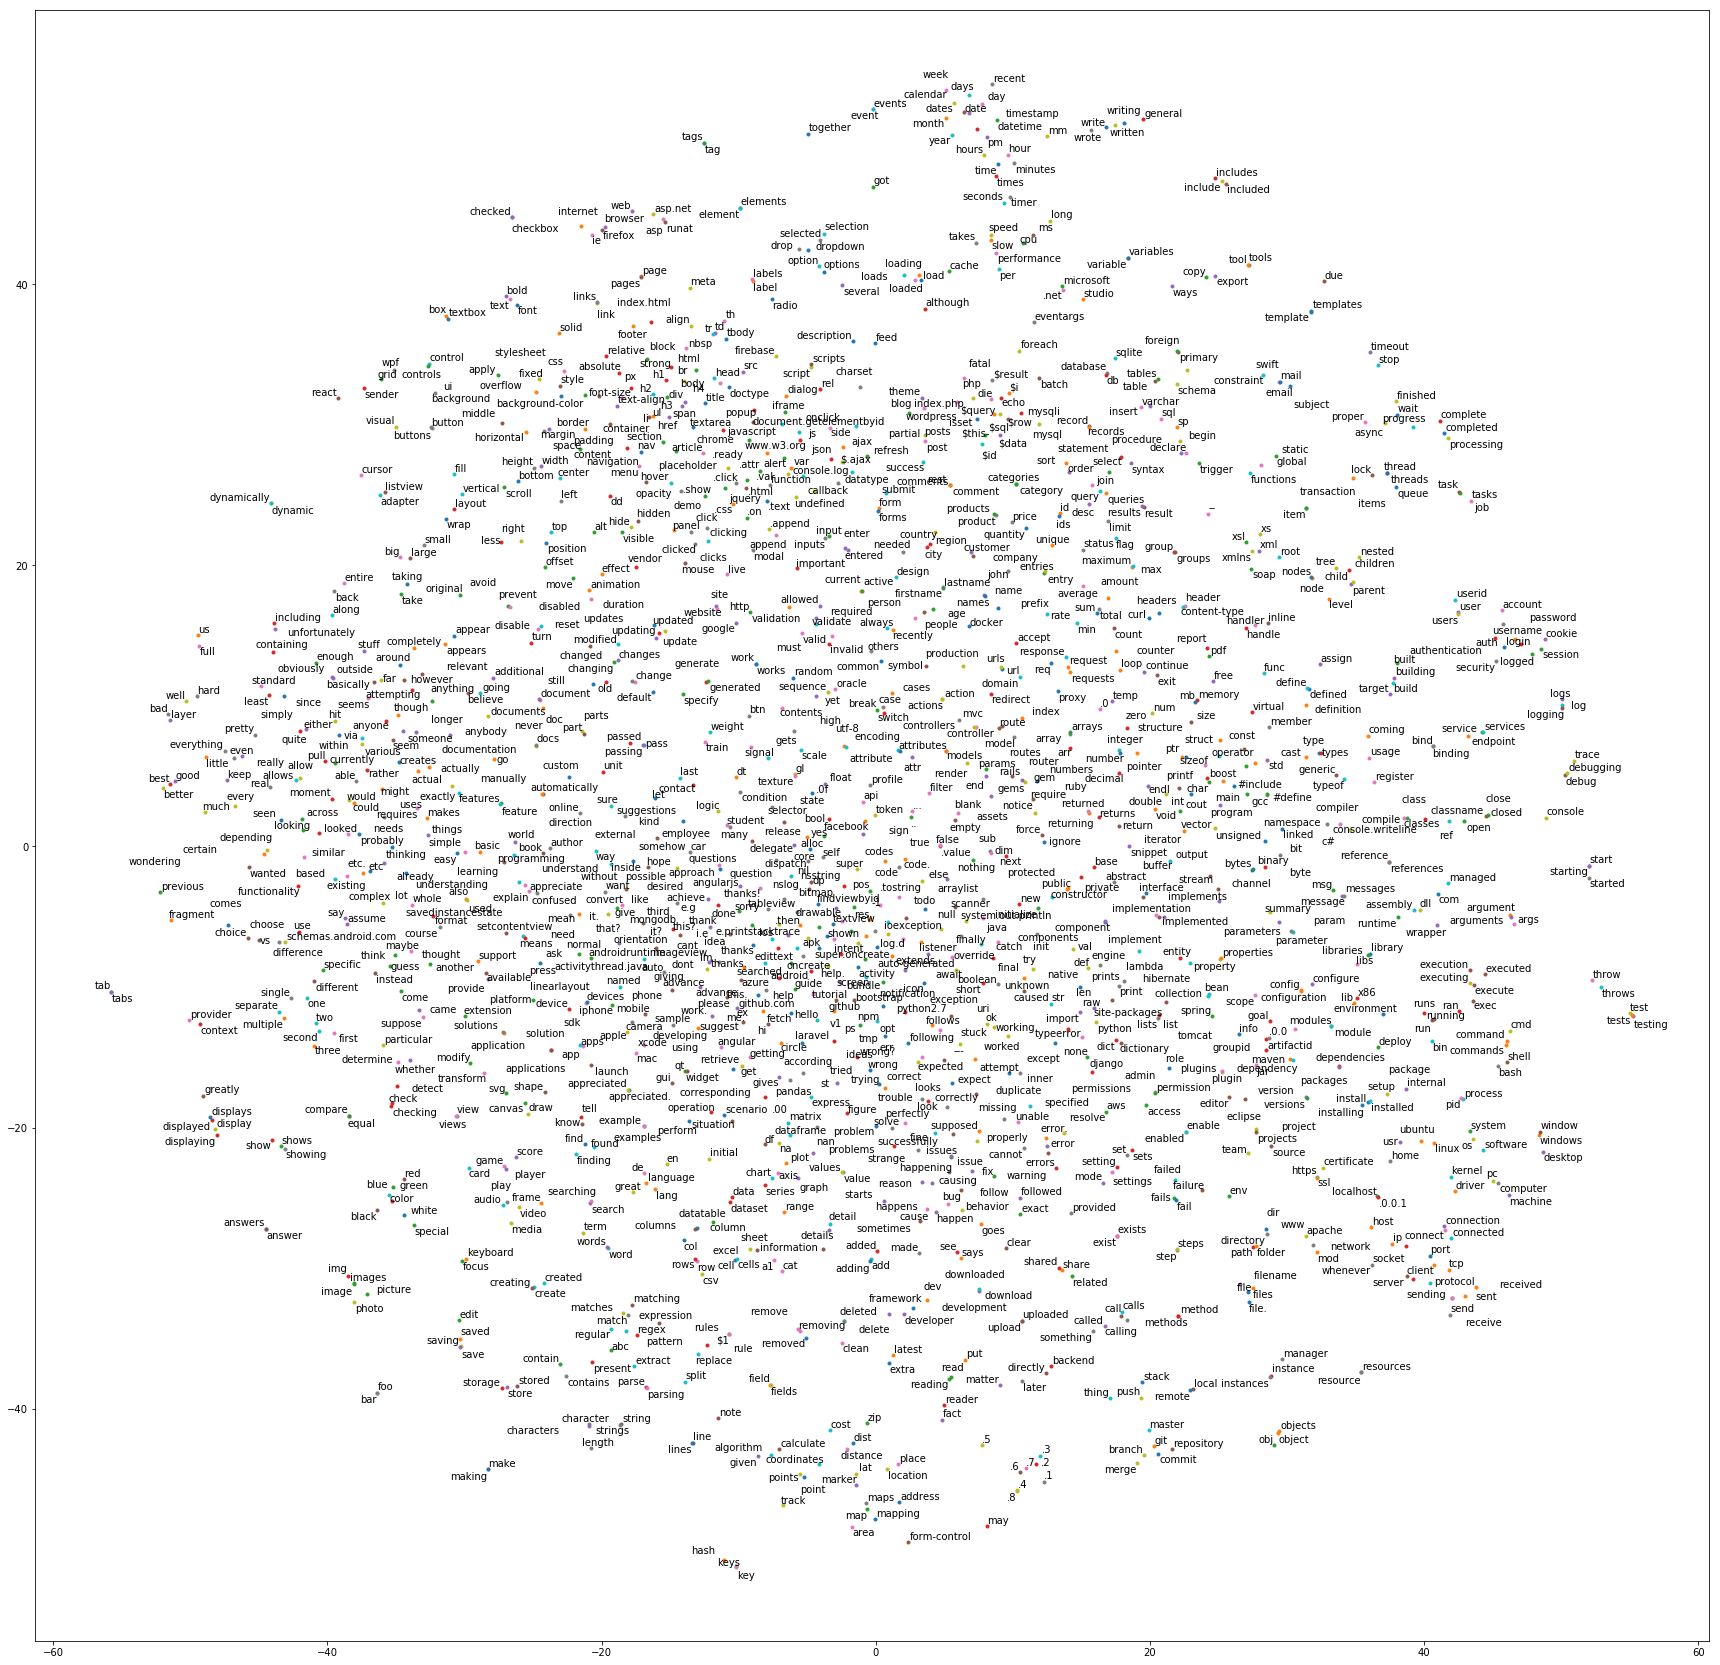

In [23]:
plt.figure(figsize=(30, 30))
texts = []
for i, word in enumerate(emb_keys_sample):
    x, y = transformed_values_sample[i, 0], transformed_values_sample[i, 1]
    plt.plot(x, y, '.')
    texts.append(plt.annotate(word, (x, y)))
adjust_text(texts)

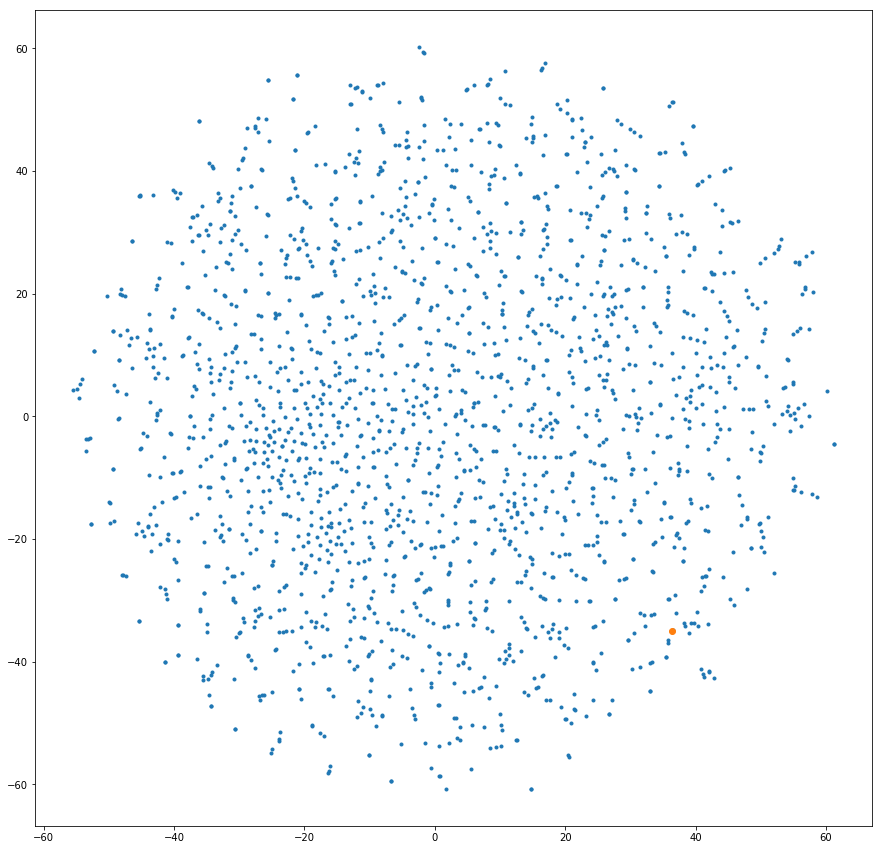

In [88]:
plt.figure(figsize=(15, 15))
plt.plot(transformed_values_sample[:, 0], transformed_values_sample[:, 1], '.')
plt.plot(transformed_values_sample[518, 0], transformed_values_sample[518, 1], 'o')